# Introduction

**This project is mixed of basic and advanced SQL queries to do the analysis on a modified version of a database called [Chinook](https://github.com/lerocha/chinook-database). The Chinook database contains information about a fictional digital music shop - kind of like a mini-iTunes store.** <br> <br> The Chinook database contains information about the artists, songs, and albums from the music shop, as well as information on the shop's employees, customers, and the customers purchases. This information is contained in eleven tables. 

**The below schema diagram has shown the table conncection with primary and secondary key inside the Chinook database**
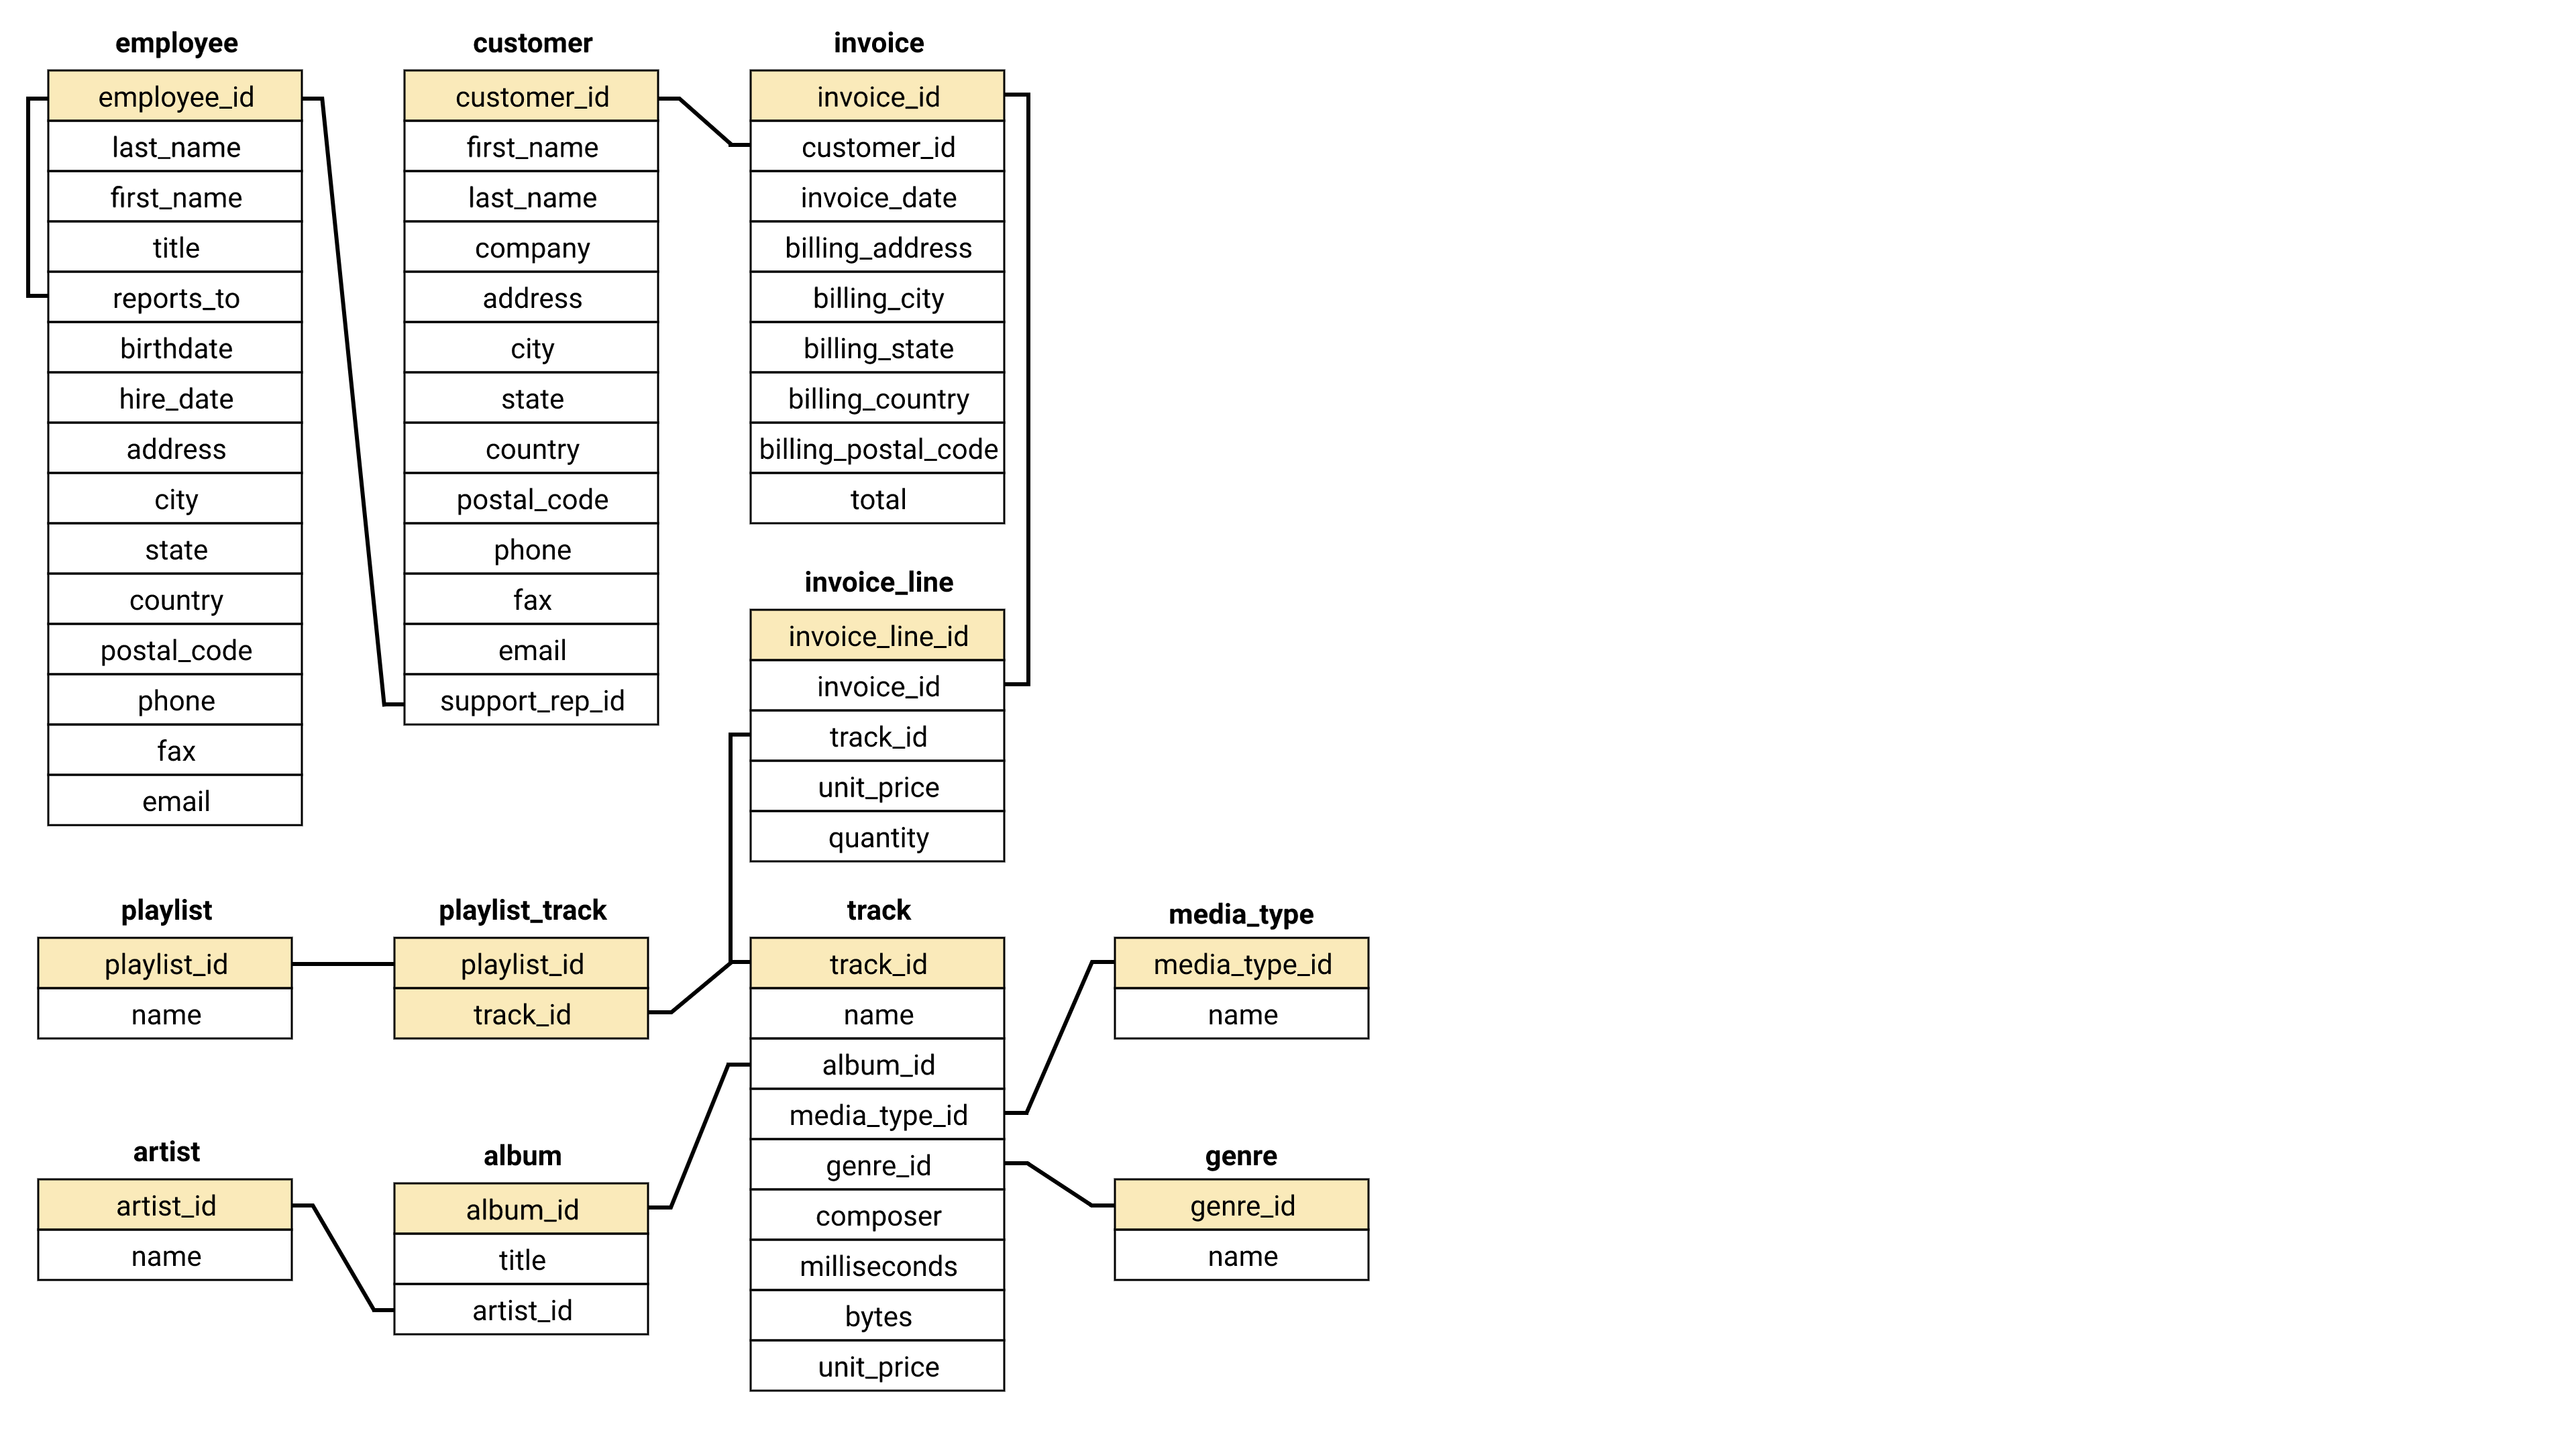

**Load the database and show all available tables**

In [4]:
%load_ext sql
%sql sqlite:///chinook.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @chinook.db'

In [7]:
%%sql
-- All available tables

SELECT * FROM sqlite_master;

 * sqlite:///chinook.db
Done.


type,name,tbl_name,rootpage,sql
table,album,album,2,"CREATE TABLE [album]( [album_id] INTEGER PRIMARY KEY NOT NULL, [title] NVARCHAR(160) NOT NULL, [artist_id] INTEGER NOT NULL, FOREIGN KEY ([artist_id]) REFERENCES [artist] ([artist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,artist,artist,3,"CREATE TABLE [artist]( [artist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,customer,customer,4,"CREATE TABLE [customer]( [customer_id] INTEGER PRIMARY KEY NOT NULL, [first_name] NVARCHAR(40) NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [company] NVARCHAR(80), [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60) NOT NULL, [support_rep_id] INTEGER, FOREIGN KEY ([support_rep_id]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,employee,employee,5,"CREATE TABLE [employee]( [employee_id] INTEGER PRIMARY KEY NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [first_name] NVARCHAR(20) NOT NULL, [title] NVARCHAR(30), [reports_to] INTEGER, [birthdate] DATETIME, [hire_date] DATETIME, [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60), FOREIGN KEY ([reports_to]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,genre,genre,6,"CREATE TABLE [genre]( [genre_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,invoice,invoice,7,"CREATE TABLE [invoice]( [invoice_id] INTEGER PRIMARY KEY NOT NULL, [customer_id] INTEGER NOT NULL, [invoice_date] DATETIME NOT NULL, [billing_address] NVARCHAR(70), [billing_city] NVARCHAR(40), [billing_state] NVARCHAR(40), [billing_country] NVARCHAR(40), [billing_postal_code] NVARCHAR(10), [total] NUMERIC(10,2) NOT NULL, FOREIGN KEY ([customer_id]) REFERENCES [customer] ([customer_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,invoice_line,invoice_line,8,"CREATE TABLE [invoice_line]( [invoice_line_id] INTEGER PRIMARY KEY NOT NULL, [invoice_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, [unit_price] NUMERIC(10,2) NOT NULL, [quantity] INTEGER NOT NULL, FOREIGN KEY ([invoice_id]) REFERENCES [invoice] ([invoice_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,media_type,media_type,9,"CREATE TABLE [media_type]( [media_type_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist,playlist,10,"CREATE TABLE [playlist]( [playlist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist_track,playlist_track,11,"CREATE TABLE [playlist_track]( [playlist_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, CONSTRAINT [pk_playlist_track] PRIMARY KEY ([playlist_id], [track_id]), FOREIGN KEY ([playlist_id]) REFERENCES [playlist] ([playlist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


# Query 1: summary data of playlist
**Let's create a query that shows summary data for every playlist in the Chinook database:**
The final table would have the following columns, in order:
- playlist_id - the unique ID for the playlist.
- playlist_name - The name of the playlist.
- number_of_tracks - A count of the number of tracks in the playlist.
- length_seconds - The sum of the length of the playlist in seconds. This column should be an integer.

In [66]:
%%sql

WITH track_info AS (                              
    SELECT
        playlist.playlist_id AS playlist_id,
        playlist.name AS playlist_name,
        track.name AS track_name,
        track.milliseconds / 1000 AS length
    FROM playlist 
    LEFT JOIN playlist_track ON playlist.playlist_id = playlist_track.playlist_id
    LEFT JOIN track ON playlist_track.track_id = track.track_id
    )

SELECT playlist_id playlist_id,                    
        playlist_name playlist_name,
        COUNT(track_name) number_of_tracks,
        SUM(length) length_seconds
FROM track_info
GROUP BY 1, 2
ORDER BY 1;

 * sqlite:///chinook.db
Done.


playlist_id,playlist_name,number_of_tracks,length_seconds
1,Music,3290,876049
2,Movies,0,None
3,TV Shows,213,500987
4,Audiobooks,0,None
5,90’s Music,1477,397970
6,Audiobooks,0,None
7,Movies,0,None
8,Music,3290,876049
9,Music Videos,1,294
10,TV Shows,213,500987


# Query 2: Information on specific purchase
**Our first task is to gather some information on a specific purchase (as an example we will take the invoice id 4). For one single purchase (invoice_id) we want to know, for each track purchased:**

- The id of the track.
- The name of the track.
- The name of the artist.
- The name of media type of the track.
- The price that the customer paid for the track.
- The quantity of the track that was purchased.

**Used table: invoice_line, track, media_type, artist**

In [11]:
%%sql

SELECT
    il.track_id,
    t.name track_name,
    ar.name artist_name,
    mt.name track_type,
    il.unit_price,
    il.quantity
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar on ar.artist_id = al.artist_id
WHERE il.invoice_id = 4;           -- invoice_id 4

 * sqlite:///chinook.db
Done.


track_id,track_name,artist_name,track_type,unit_price,quantity
3448,"Lamentations of Jeremiah, First Set \ Incipit Lamentatio",The King's Singers,Protected AAC audio file,0.99,1
2560,Violent Pornography,System Of A Down,MPEG audio file,0.99,1
3336,War Pigs,Cake,Purchased AAC audio file,0.99,1
829,Let's Get Rocked,Def Leppard,MPEG audio file,0.99,1
1872,Attitude,Metallica,MPEG audio file,0.99,1
748,Dealer,Deep Purple,MPEG audio file,0.99,1
1778,You're What's Happening (In The World Today),Marvin Gaye,MPEG audio file,0.99,1
2514,Spoonman,Soundgarden,MPEG audio file,0.99,1


# Query 3: top 5 artists
**Let's find out which artists are purchased the most. Specifically, what we want to produce is a query that lists the top 10 artists, calculated by the number of times a track by that artist has been purchased.**

**Used table: invoice_line, track, album, artist**

In [13]:
%%sql

SELECT
    ta.artist,
    COUNT(*) AS number
FROM invoice_line il
INNER JOIN (                 -- Subquery stars
            SELECT                         
                t.track_id,
                ar.name artist
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta              -- Subquery ends 
           ON ta.track_id = il.track_id
GROUP BY 1
ORDER BY 2 DESC 
LIMIT 10;

 * sqlite:///chinook.db
Done.


artist,number
Queen,192
Jimi Hendrix,187
Red Hot Chili Peppers,130
Nirvana,130
Pearl Jam,129
Guns N' Roses,124
AC/DC,124
Foo Fighters,121
The Rolling Stones,117
Metallica,106


-   We see that 'Queens' had the highest number of sales.

# Optional:
**If we want we can even visualize this finding with barplot.**

In [53]:
# Importing libraries 

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
import sqlite3
con = sqlite3.connect('chinook.db')

cur = con.cursor()

In [54]:
cur.execute("SELECT ta.artist, COUNT(*) AS number FROM invoice_line il INNER JOIN ( SELECT t.track_id, ar.name artist FROM track t INNER JOIN album al ON al.album_id = t.album_id INNER JOIN artist ar ON ar.artist_id = al.artist_id) ta ON ta.track_id = il.track_id GROUP BY 1 ORDER BY 2 DESC LIMIT 10;")

In [55]:
# Fetching all rows
d = cur.fetchall()

# Creating a dataframe
df = pd.DataFrame(d,columns = ['artist', 'number'])

# first 5 rows
df.head()

,artist,number
0,Queen,192
1,Jimi Hendrix,187
2,Red Hot Chili Peppers,130
3,Nirvana,130
4,Pearl Jam,129


<Figure size 1045x475 with 0 Axes>

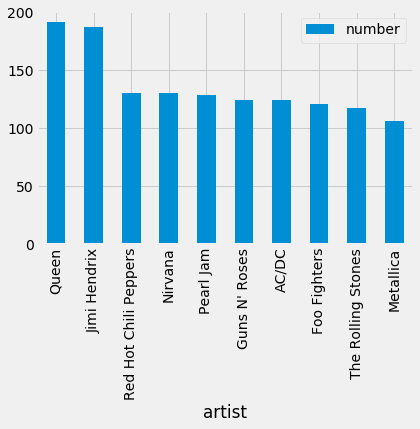

In [57]:
# Style
plt.style.use('fivethirtyeight')
plt.figure(figsize=[11,5], dpi= 95)

# Bar plot
df.plot.bar('artist', 'number')

plt.show()

# Query 4: Top 10 albums
**Write a query that returns the top 10 albums, as calculated by the number of times a track from that album has been purchased.**

**Used tables: invoice_line, track, album, artist**

In [59]:
%%sql

SELECT
    ta.album_title album,
    ta.artist_name artist,
    COUNT(*) tracks_purchased
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                al.title album_title,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
GROUP BY 1, 2
ORDER BY 3 DESC LIMIT 10;

 * sqlite:///chinook.db
Done.


album,artist,tracks_purchased
Are You Experienced?,Jimi Hendrix,187
Faceless,Godsmack,96
Mezmerize,System Of A Down,93
Get Born,JET,90
The Doors,The Doors,83
Big Ones,Aerosmith,80
Greatest Hits I,Queen,80
The Police Greatest Hits,The Police,80
From The Muddy Banks Of The Wishkah [live],Nirvana,78
My Generation - The Very Best Of The Who,The Who,76


**In the employee table we see that there are two columns: employee_id and reports to. It means a employee has supervisor to report to** 

In [61]:
%%sql

SELECT employee_id, first_name, last_name, reports_to 
FROM employee 
LIMIT 3;

 * sqlite:///chinook.db
Done.


employee_id,first_name,last_name,reports_to
1,Andrew,Adams,None
2,Nancy,Edwards,1
3,Jane,Peacock,2


# Query 5: employee and their supervisor
**Write a query that returns information about each employee and their supervisor.**

##### Used tables: employee

In [63]:
%%sql

SELECT t1.first_name || ' ' || t1.last_name AS employee_name, t1.title AS employee_title,
                t2.first_name || ' ' || t2.last_name AS supervisor_name, t2.title AS supervisor_title
FROM employee AS t1
LEFT JOIN employee AS t2
ON t1.reports_to = t2.employee_id
ORDER BY 1
LIMIT 10;

 * sqlite:///chinook.db
Done.


employee_name,employee_title,supervisor_name,supervisor_title
Andrew Adams,General Manager,None,None
Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
Laura Callahan,IT Staff,Michael Mitchell,IT Manager
Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
Michael Mitchell,IT Manager,Andrew Adams,General Manager
Nancy Edwards,Sales Manager,Andrew Adams,General Manager
Robert King,IT Staff,Michael Mitchell,IT Manager
Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager


# Query 6: contact details

**Write a query that finds the contact details of a customer with a first_name containing "Belle" from the database.**

##### Used table: customer

In [64]:
%%sql

SELECT
    first_name,
    last_name,
    phone
FROM customer
where first_name LIKE "%belle%";

 * sqlite:///chinook.db
Done.


first_name,last_name,phone
Isabelle,Mercier,+33 03 80 73 66 99


# Query 7: customer category
**In the database, we have customers name with their total amoun of expenses. We can categorize a customer based on their expenses. For example**

-  small spender: If the customer's total purchases are less than 40. 
-   big spender: If the customer's total purchases are greater than 100. 
-  regular: If the customer's total purchases are between 40 and 100.

Let's write a query to show customers name with their expense category.

##### Used tables: customer, invoice

In [65]:
%%sql

SELECT customer.first_name || ' ' || customer.last_name AS customer_name,
        count(*) AS number_of_purchases,
        sum(invoice.total) AS total_spent,
        CASE
        WHEN sum(invoice.total) BETWEEN 40 AND 100 THEN 'regular'
        WHEN sum(invoice.total) < 40 THEN 'small spender'
        WHEN sum(invoice.total) > 100 THEN 'big spender'
        END AS customer_category
FROM customer
INNER JOIN invoice
ON invoice.customer_id = customer.customer_id
GROUP BY customer.customer_id
ORDER BY 1;

 * sqlite:///chinook.db
Done.


customer_name,number_of_purchases,total_spent,customer_category
Aaron Mitchell,8,70.28999999999999,regular
Alexandre Rocha,10,69.3,regular
Astrid Gruber,9,69.3,regular
Bjørn Hansen,9,72.27000000000001,regular
Camille Bernard,9,79.2,regular
Daan Peeters,7,60.38999999999999,regular
Dan Miller,12,95.03999999999999,regular
Diego Gutiérrez,5,39.6,small spender
Dominique Lefebvre,9,72.27,regular
Eduardo Martins,12,60.39,regular


# Query 8: customers who live in the usa and spent more than 90 dollars.
**There might be a case when a company needs to advertise their product for a certain group of customers. For example, We need the list of customers who have spent more than a specific amount. Or list of the customers who live in the USA**

Let's create a query of customers that have purchased more than $90 from our store. We will do this in two step to make the code more readable. 
-  Firstly, we will create a view to use this table later on like a function.
-  And then, will call all that rows from the created view.

In [78]:
%%sql
-- Creating the View

CREATE VIEW customer_gt_90_dollars AS
    SELECT
        c.*
    FROM customer AS c
    INNER JOIN invoice AS i ON c.customer_id = i.customer_id
    GROUP BY c.customer_id
    HAVING SUM(i.total) > 90
    ORDER BY c.customer_id;
    
    
-- Calling all rows

SELECT * 
FROM customer_gt_90_dollars
LIMIT 5;

 * sqlite:///chinook.db
Done.
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4


-  The dataset where all customers spent more than 90 dollars.

In [74]:
%%sql
-- List of the customers who lives in the USA 

CREATE VIEW customer_usa AS 
     SELECT * FROM customer
     WHERE country = "USA";
        
-- Calling all the rows.

SELECT * FROM customer_usa
LIMIT 5;

 * sqlite:///chinook.db
Done.
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3
19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


-   The dataset where all the customers are form USA

**So we have created two VIEW: customer_gt_90_dollars, customer_usa. Now we can work on the UNION, INTERSECT and EXCEPT operators.** 

**We will try to figure out the below queries**
- Customers in the USA or have spent more than 90 dollar.
- Customers in the USA and have spent more than 90 dollar.
- Customers in the USA and have not spent more than 90 dollar.

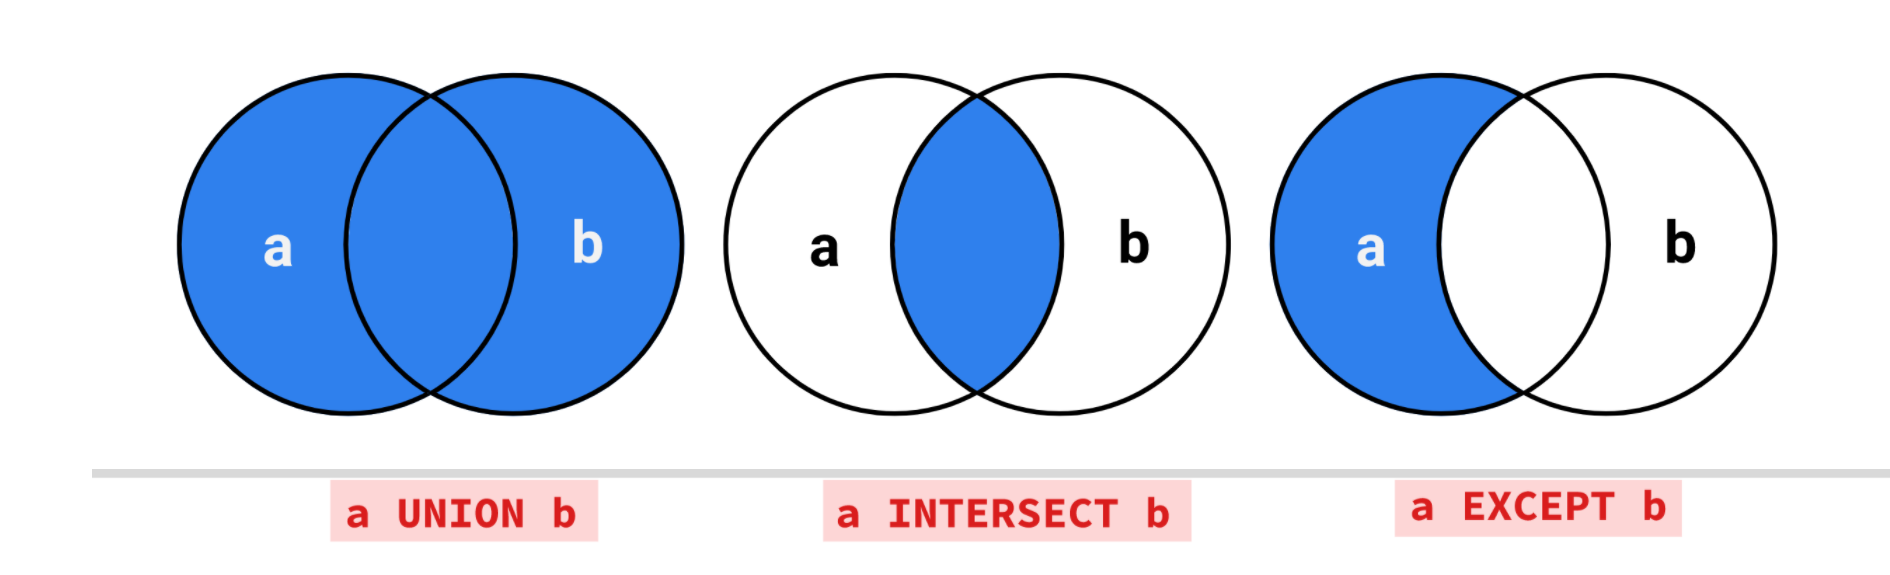

# Query 9: 
**Customers in the USA or have spent more than 90 dollar.**

In [81]:
%%sql

SELECT * FROM customer_usa
INTERSECT
SELECT * FROM customer_gt_90_dollars;

 * sqlite:///chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4
21,Kathy,Chase,None,801 W 4th Street,Reno,NV,USA,89503,+1 (775) 223-7665,None,kachase@hotmail.com,5
22,Heather,Leacock,None,120 S Orange Ave,Orlando,FL,USA,32801,+1 (407) 999-7788,None,hleacock@gmail.com,4


# Query 10:
**Customers in the USA and have spent more than 90 dollar.**

In [82]:
%%sql

SELECT * FROM customer_usa
UNION
SELECT * FROM customer_gt_90_dollars;

 * sqlite:///chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3
19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


# Query 11

**Let's write a query that works out how many customers that are in the USA and have purchased more than 90 are assigned to each sales support agent.**

In [80]:
%%sql

WITH customers_usa_gt_90 AS
    (
     SELECT * FROM customer_usa

     UNION

     SELECT * FROM customer_gt_90_dollars
    )

SELECT
    e.first_name || " " || e.last_name employee_name,
    COUNT(c.customer_id) customers_usa_gt_90
FROM employee e
LEFT JOIN customers_usa_gt_90 c ON c.support_rep_id = e.employee_id
WHERE e.title = 'Sales Support Agent'
GROUP BY 1 ORDER BY 1;

 * sqlite:///chinook.db
Done.


employee_name,customers_usa_gt_90
Jane Peacock,11
Margaret Park,9
Steve Johnson,7


# Query 12:
**We will be writing aour last query to find the customer from each country that has spent the most money at our store.**

To do this, we will follow the below algorithm.
1.  create a table group by country and customer_id
2.  determine the total sum group by customer_id
3.  join table 1 & 2
4.  group by country and determine the max(total) from the joined table

**Step 1**

In [85]:
%%sql

CREATE VIEW group_country_cus_id AS
    SELECT * FROM customer
    GROUP BY country, customer_id
    ORDER BY country;

 * sqlite:///chinook.db
Done.


[]

In [86]:
%%sql

SELECT * 
FROM group_country_cus_id
LIMIT 3;

 * sqlite:///chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
56,Diego,Gutiérrez,None,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,+54 (0)11 4311 4333,None,diego.gutierrez@yahoo.ar,4
55,Mark,Taylor,None,421 Bourke Street,Sidney,NSW,Australia,2010,+61 (02) 9332 3633,None,mark.taylor@yahoo.au,4
7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5


**Step 2**

In [90]:
%%sql

CREATE VIEW group_total_sum AS 
    SELECT 
        customer_id AS customer_id,
        SUM(total) AS total
    FROM invoice
    GROUP BY customer_id;

 * sqlite:///chinook.db
Done.


[]

In [92]:
%%sql

SELECT * FROM group_total_sum
LIMIT 3;

 * sqlite:///chinook.db
Done.


customer_id,total
1,108.89999999999998
2,82.17
3,99.99


**Step 3 and Step 4**

In [93]:
%%sql

SELECT 
    country,
    gc.first_name || ' ' || gc.last_name AS customer_name,
    MAX(gt.total) AS total_purchased
FROM group_country_cus_id AS gc
INNER JOIN group_total_sum AS gt
ON gc.customer_id = gt.customer_id
GROUP BY 1
ORDER BY 1;

 * sqlite:///chinook.db
Done.


country,customer_name,total_purchased
Argentina,Diego Gutiérrez,39.6
Australia,Mark Taylor,81.18
Austria,Astrid Gruber,69.3
Belgium,Daan Peeters,60.38999999999999
Brazil,Luís Gonçalves,108.89999999999998
Canada,François Tremblay,99.99
Chile,Luis Rojas,97.02000000000001
Czech Republic,František Wichterlová,144.54000000000002
Denmark,Kara Nielsen,37.61999999999999
Finland,Terhi Hämäläinen,79.2


# Conclusion
**So, we have worked on many queries to see the relationship between the tables. We successfully performed VIEW, JOIN, SUBQUERIES, etc.**
#### Thank you so much for spending time on my project.